In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pltimport 
import os, copy
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import time
import math, tqdm
import seaborn as sns
from lib.model import MLP, RNN_LSTM
from lib.data import Data, MNIST_add_data
from lib.utils import timeSince
from lib.train import TrainMLP, TrainRNN
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from lib.evaluation import Evaluation, plot_confusion

In [10]:
root = './mnist_data'
if not os.path.exists(root):
    os.mkdir(root)
    
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

### MLP: sanity check

In [3]:
net = MLP([784, 300, 10])
optimizer = torch.optim.Adam(net.parameters())
criterion = nn.NLLLoss()
train_data = Data(train_set)

trainer = TrainMLP(net, optimizer, criterion, train_data)
trainer.train()

31 0% (0m 7s) 0.0564 
62 1% (0m 8s) 0.0293 
93 2% (0m 8s) 0.0197 
124 3% (0m 8s) 0.0177 
155 4% (0m 9s) 0.0147 
186 5% (0m 9s) 0.0141 
217 6% (0m 9s) 0.0137 
248 7% (0m 10s) 0.0132 
279 8% (0m 10s) 0.0150 
310 9% (0m 11s) 0.0133 
341 10% (0m 11s) 0.0128 
372 11% (0m 11s) 0.0131 
403 12% (0m 12s) 0.0122 
434 13% (0m 12s) 0.0125 
465 14% (0m 12s) 0.0115 
496 15% (0m 12s) 0.0099 
527 16% (0m 13s) 0.0116 
558 17% (0m 13s) 0.0101 
589 18% (0m 13s) 0.0097 
620 19% (0m 14s) 0.0112 
651 20% (0m 14s) 0.0081 
682 21% (0m 14s) 0.0078 
713 22% (0m 15s) 0.0085 
744 23% (0m 15s) 0.0096 
775 24% (0m 16s) 0.0090 
806 25% (0m 16s) 0.0100 
837 26% (0m 16s) 0.0085 
868 27% (0m 16s) 0.0090 
899 28% (0m 17s) 0.0091 
930 29% (0m 17s) 0.0086 
961 30% (0m 17s) 0.0088 
992 31% (0m 18s) 0.0075 
1023 32% (0m 18s) 0.0074 
1054 33% (0m 18s) 0.0082 
1085 34% (0m 19s) 0.0081 
1116 35% (0m 19s) 0.0074 
1147 36% (0m 19s) 0.0072 
1178 37% (0m 20s) 0.0078 
1209 38% (0m 20s) 0.0059 
1240 39% (0m 20s) 0.0075 
1271 40% (0m

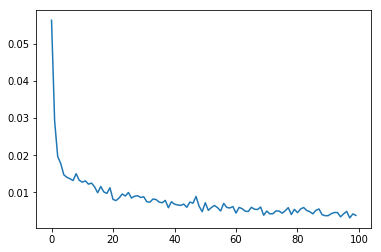

In [4]:
plt.plot(trainer.all_losses)
plt.show()

accuracy is 96.01%


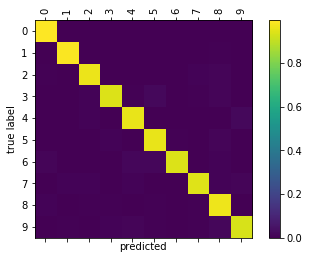

In [5]:
n_categories = 10
evaluation = Evaluation(net, Data(test_set))
confusion = evaluation.confusion(n_categories, n_confusion=10000)
plot_confusion(confusion)

# Sequence task: 1-3 mnist digits addition mod 10 (one output for seq)

In [28]:
# sample n_samples correctly classified examples
def getCorrect(net, data, n_samples=100):
    xs = []
    ys = []

    i = 0
    while i < n_samples:
        d = data.random_batch(batch_size=1)
        x, y = d[0], d[1]
        output = net.eval_forward(*d)
        _, ans = torch.max(output, 1)
        if ans.item() != y.item(): # incorrect
            continue

        xs.append(x)
        ys.append(y)
        i += 1
    return xs, ys

def show_examples(net, xs, ys, n_show=3):
    for x, y in zip(xs[:n_show], ys[:n_show]):
        yhat = net.eval_forward(x, y, [len(x)])
        val, ind = torch.max(yhat, 1)
        
        n_images, _, w_h = x.shape
        print('label: %d, predict: %d, prob: %.2f' % (y.item(), ind.item(), np.exp(val.item())))
        for i in range(n_images):
            plt.subplot(1,3,i+1)
            plt.imshow(x[i].view(28,28).detach().numpy())
        plt.show()

### Independent LSTM (each time step uses an independent LSTM cell)

In [ ]:
class RNN_ILSTM(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_ILSTM, self).__init__()
        

### LSTM

In [7]:
n_hidden = 300
n_categories = 10
net = RNN_LSTM(784, n_hidden, n_categories)

optimizer = torch.optim.Adam(net.parameters())
criterion = nn.NLLLoss()
train_data = MNIST_add_data(train_set)

trainer = TrainRNN(net, optimizer, criterion, train_data)
trainer.train()

31 0% (0m 1s) 0.0716 
62 1% (0m 2s) 0.0696 
93 2% (0m 4s) 0.0669 
124 3% (0m 6s) 0.0621 
155 4% (0m 8s) 0.0581 
186 5% (0m 11s) 0.0555 
217 6% (0m 15s) 0.0527 
248 7% (0m 19s) 0.0519 
279 8% (0m 21s) 0.0503 
310 9% (0m 24s) 0.0500 
341 10% (0m 27s) 0.0508 
372 11% (0m 31s) 0.0490 
403 12% (0m 34s) 0.0482 
434 13% (0m 39s) 0.0459 
465 14% (0m 43s) 0.0474 
496 15% (0m 47s) 0.0468 
527 16% (0m 50s) 0.0454 
558 17% (0m 53s) 0.0464 
589 18% (0m 58s) 0.0445 
620 19% (1m 2s) 0.0446 
651 20% (1m 6s) 0.0431 
682 21% (1m 10s) 0.0433 
713 22% (1m 14s) 0.0443 
744 23% (1m 18s) 0.0430 
775 24% (1m 20s) 0.0431 
806 25% (1m 25s) 0.0417 
837 26% (1m 29s) 0.0394 
868 27% (1m 33s) 0.0410 
899 28% (1m 36s) 0.0410 
930 29% (1m 38s) 0.0407 
961 30% (1m 42s) 0.0381 
992 31% (1m 47s) 0.0399 
1023 32% (1m 50s) 0.0384 
1054 33% (1m 53s) 0.0384 
1085 34% (1m 57s) 0.0392 
1116 35% (1m 58s) 0.0356 
1147 36% (2m 2s) 0.0346 
1178 37% (2m 5s) 0.0397 
1209 38% (2m 11s) 0.0344 
1240 39% (2m 17s) 0.0342 
1271 40% (2m 2

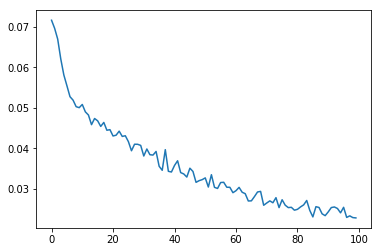

In [8]:
plt.plot(trainer.all_losses)
plt.show()

accuracy is 93.70%


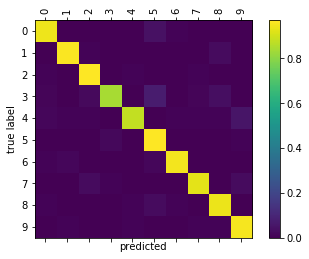

In [14]:
n_categories = 10
evaluation = Evaluation(net, MNIST_add_data(test_set, min_length=1, max_length=1))
confusion = evaluation.confusion(n_categories, n_confusion=1000)
plot_confusion(confusion)

label: 9, predict: 9, prob: 0.70


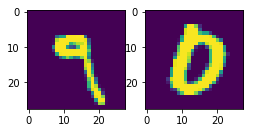

label: 6, predict: 6, prob: 0.44


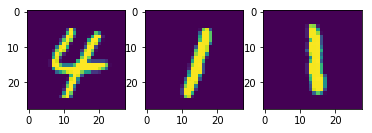

label: 8, predict: 8, prob: 0.23


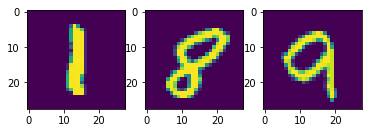

In [27]:
xs, ys = getCorrect(net, MNIST_add_data(test_set, min_length=2, max_length=3))    
show_examples(net, xs, ys)

# Q3 MTL matrix factorization method with learnable gates (deprecated; as reference to how to implement hypernetwork)

In [827]:
# overload '+' sign to have two tasks and still train for the rnn class
net_res = RNN_LSTM(784, n_hidden, n_categories)
n_basis = 2
params = []

coef = torch.nn.Parameter(torch.zeros(n_basis))
nn.init.uniform_(coef)
net_res.coef = coef

for n, p in net_res.named_parameters():
    if 'bias' not in n and 'coef' not in n:
        for _ in range(n_basis):
            theta = torch.nn.Parameter(p.data / n_basis)
            params.append(theta)
    else:
        params.append(p)

net_res.forward_ready = False
net_res.params = params
net_res.n_basis = n_basis

def forward_function(x_list, coef):
    res = 0
    for i in range(len(x_list)):
        res += x_list[i] * coef[i]
    return res
    
def prepare_forward(self, x_not_used):
    
    if hasattr(self, 'forward_ready') and self.forward_ready:
        return 
    
    i = 0
    for n, p in self.named_parameters():
        if 'bias' not in n and 'coef' not in n:
            p.data = forward_function(self.params[i:i+self.n_basis], self.coef)
            i += self.n_basis
        else:
            i += 1
    self.forward_ready = True

def after_backward(self):
    # bug report: in register_backward_hook, backward failed!!! need to explicitly do it as shown in train_rnn_reg2 below
    i = 0
    for n, p in self.named_parameters():
        if 'bias' not in n and 'coef' not in n:
            c = forward_function(self.params[i:i+n_basis], self.coef)
            if p.grad is not None:
                c.backward(p.grad)
                p.grad.zero_() # zero out parameter grad
            i += self.n_basis
        else:
            i += 1
    self.forward_ready = False

def train_rnn_reg2(net, optimizer, criterion, x, y, x_lengths):
    optimizer.zero_grad()

    loss = criterion(net, x, y, x_lengths)
    loss.backward()
    after_backward(net)

    optimizer.step()

    return output, loss.item()

def l0(loss, alpha):
    
    def reg(x):
        return 0.5 * x.dot(x)
    
    def ret(net, x, y, x_lengths):
        x.requires_grad = True
        yhat = evaluateBatch(net, x, x_lengths)
        l = loss(yhat, y)
        return l
    
    return ret

#print([x.shape for x in params])
print(net_res.coef)

Parameter containing:
tensor([0.1168, 0.7817], requires_grad=True)
